In [13]:
from pathlib import Path
import pandas as pd

# Usar Path para manejar la ruta (corrigiendo el nombre del directorio de usuarios)
file_path = Path(r"C:\netflix1.csv")

print(f"Verificando la ruta del archivo: {file_path}")

if file_path.is_file():
    # Cargar el dataset
    netflix_data = pd.read_csv(file_path)
    # Mostrar las primeras filas del dataset
    print(netflix_data.head())
else:
    print("El archivo no se encuentra en la ruta especificada:", file_path)



Verificando la ruta del archivo: C:\netflix1.csv
  show_id     type                             title         director   
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson  \
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration   
0  United States  9/25/2021          2020  PG-13    90 min  \
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, Internatio

In [14]:
df_netflix =  print(netflix_data.head())


  show_id     type                             title         director   
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson  \
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration   
0  United States  9/25/2021          2020  PG-13    90 min  \
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

In [15]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [16]:
# Verificar valores nulos en cada columna
null_values = netflix_data.isnull().sum()
print(null_values)

# Eliminar filas con valores nulos
netflix_data_cleaned = netflix_data.dropna()
print(f"Datos después de eliminar valores nulos: {netflix_data_cleaned.shape}")


show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64
Datos después de eliminar valores nulos: (8790, 10)


Dado que no hay valores nulos en el dataset según la descripción proporcionada, no hay necesidad de eliminar filas por valores nulos

In [17]:
# Verificar todas las columnas del dataset
print(netflix_data.columns)


Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')


la columna listed_in contiene diferentes valores separados por coma, vamos elegir el primer valor y guardarlo en una columna llamada 'primary_genre'

In [25]:
# Crear una nueva columna con el primer valor de 'listed_in'
netflix_data_cleaned['primary_genre'] = netflix_data_cleaned['listed_in'].apply(lambda x: x.split(', ')[0])
print(netflix_data_cleaned[['listed_in', 'primary_genre']].head())


                                           listed_in             primary_genre
0                                      Documentaries             Documentaries
1  Crime TV Shows, International TV Shows, TV Act...            Crime TV Shows
2                 TV Dramas, TV Horror, TV Mysteries                 TV Dramas
3                 Children & Family Movies, Comedies  Children & Family Movies
4   Dramas, Independent Movies, International Movies                    Dramas


Guardamos el dataset limpio

In [26]:
# Guardar el dataset limpio
netflix_data_cleaned.to_csv(r'C:\netflix_cleaned.csv', index=False)
print("Dataset limpio guardado en C:\\netflix_cleaned.csv")


Dataset limpio guardado en C:\netflix_cleaned.csv


Mostramos el dataset limpio

In [27]:
netflix_data_cleaned

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,primary_genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas
...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",International TV Shows
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV,Kids' TV


1. Análisis Descriptivo
Realizar un análisis descriptivo para obtener una visión general de los datos.

In [30]:
# Importar bibliotecas necesarias
import matplotlib.pyplot as plt
import seaborn as sns

# Resumen estadístico de las columnas numéricas
print(netflix_data_cleaned.describe())

# Resumen de las columnas categóricas
print(netflix_data_cleaned.describe(include=['O']))


       release_year
count   8790.000000
mean    2014.183163
std        8.825466
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000
       show_id   type  title   director        country date_added rating   
count     8790   8790   8790       8790           8790       8790   8790  \
unique    8790      2   8787       4528             86       1713     14   
top         s1  Movie  9-Feb  Not Given  United States   1/1/2020  TV-MA   
freq         1   6126      2       2588           3240        110   3205   

        duration                     listed_in primary_genre  
count       8790                          8790          8790  
unique       220                           513            36  
top     1 Season  Dramas, International Movies        Dramas  
freq        1791                           362          1599  


2. Distribución de Tipos de Contenido
Visualizar la distribución de tipos de contenido (películas vs. series).

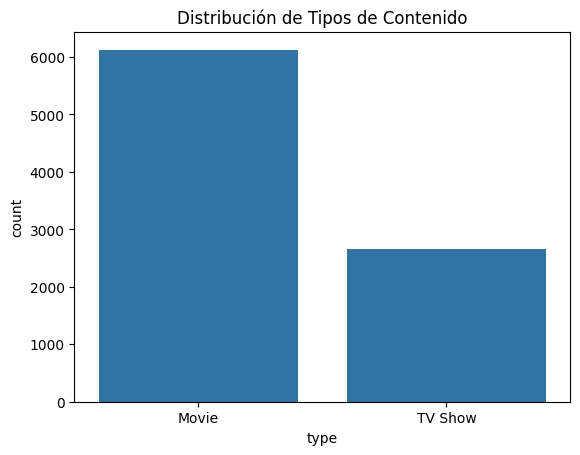

In [31]:
# Distribución de tipos de contenido
sns.countplot(data=netflix_data_cleaned, x='type')
plt.title('Distribución de Tipos de Contenido')
plt.show()


3. Análisis por País
Visualizar la cantidad de contenido producido por los diferentes países.

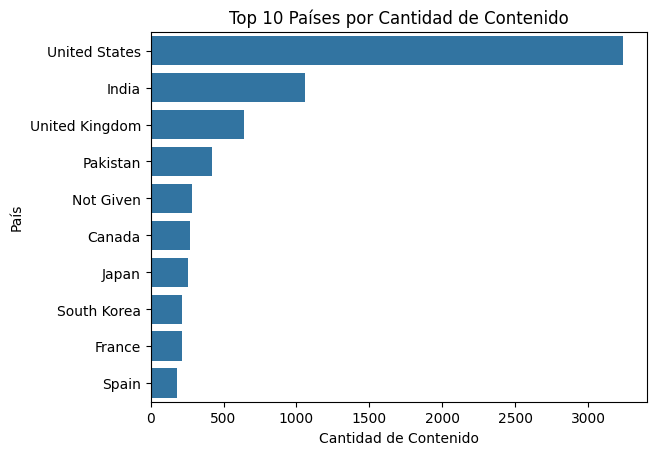

In [33]:
# Conteo de contenido por país
top_countries = netflix_data_cleaned['country'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title('Top 10 Países por Cantidad de Contenido')
plt.xlabel('Cantidad de Contenido')
plt.ylabel('País')
plt.show()


4. Distribución de Años de Lanzamiento
Visualizar la distribución de años de lanzamiento de los contenidos.

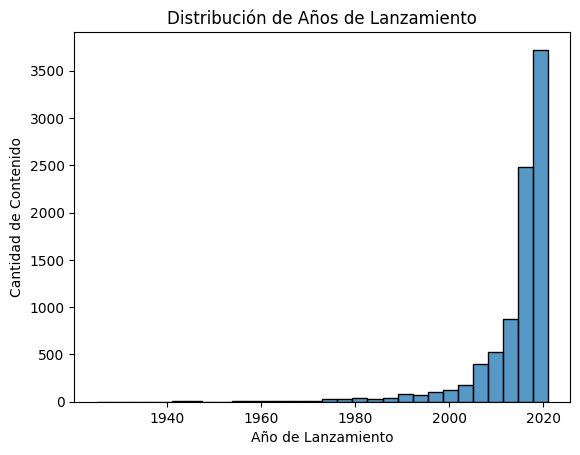

In [34]:
# Distribución de años de lanzamiento
sns.histplot(data=netflix_data_cleaned, x='release_year', bins=30)
plt.title('Distribución de Años de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Contenido')
plt.show()


5. Análisis de Géneros
Analizar la popularidad de los diferentes géneros.

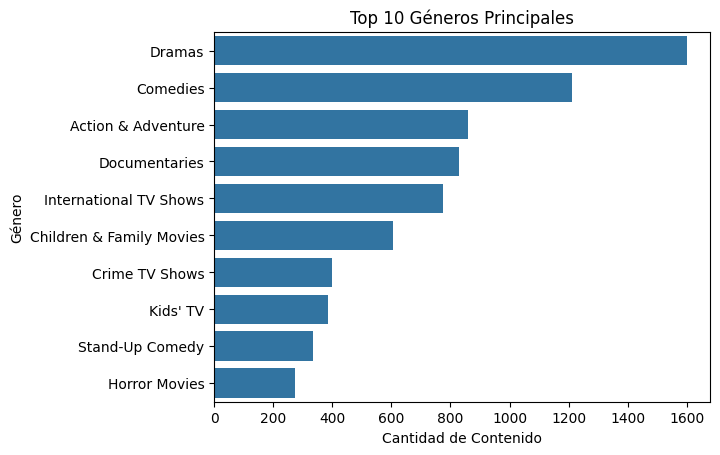

In [35]:
# Conteo de géneros principales
top_genres = netflix_data_cleaned['primary_genre'].value_counts().head(10)
sns.barplot(y=top_genres.index, x=top_genres.values)
plt.title('Top 10 Géneros Principales')
plt.xlabel('Cantidad de Contenido')
plt.ylabel('Género')
plt.show()


6. Análisis de Duración de Contenido
Analizar la duración de las películas y series.

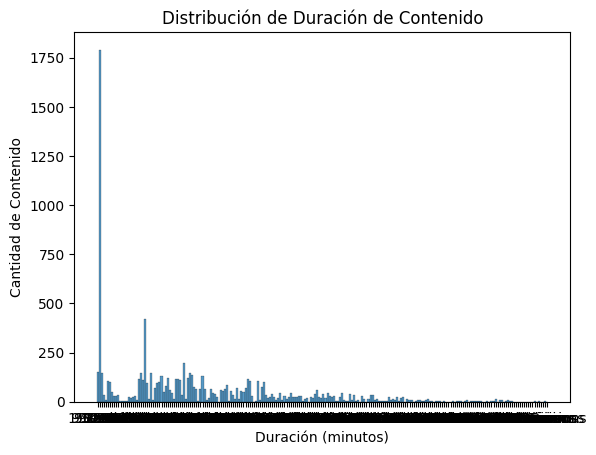

In [36]:
# Convertir duración a numérico y eliminar el texto adicional
netflix_data['duration'] = netflix_data['duration'].str.extract('(\d+)').astype(int)

# Distribución de duración
sns.histplot(data=netflix_data_cleaned, x='duration', bins=30)
plt.title('Distribución de Duración de Contenido')
plt.xlabel('Duración (minutos)')
plt.ylabel('Cantidad de Contenido')
plt.show()


7. Guardar el Análisis
Después de realizar el análisis, podemos guardar los gráficos y el resumen del análisis en un informe.

In [37]:
# Guardar el dataset limpio con análisis adicionales
netflix_data_cleaned.to_csv(r'C:\netflix_analyzed.csv', index=False)
print("Dataset analizado guardado en C:\\netflix_analyzed.csv")


Dataset analizado guardado en C:\netflix_analyzed.csv
